# Presidential Election using Decision Tree with Sklearn

**Note:** In the history of the US election, there are only two dominant parties, Democrates and Republicans, that win the elections every 4 years. Thus we will do binary classification. As our team looks at the census data in the counties level, to make the prediction process easier, we will choose the party with most counties counts as a "winning candidate" in a year instead of considering both "Population Votes" and "Electoral College Votes".

**Note:** *This notebook is for data science practice only, no political purpose in mind.*

![](https://ichef.bbci.co.uk/news/976/cpsprodpb/4081/production/_114631561_debates_index_promo976.png)

# 1. Data Processing

In [3]:
# import general libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

# import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

In [4]:
# import dataset
df = pd.read_csv('county_census_and_election_result.csv')
df.head()

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,empstat_3.0_freq,empstat_2.0_freq,state_po,county_name,democrat,green,liberitarian,other,republican,winner
0,2000,1,24566.4,634.6,46.0,46912.7,93.6,6.4,54.0,46.0,...,38.4,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,33842.9,1080.1,42.4,65021.9,95.3,4.7,50.3,49.7,...,25.2,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,4,28331.7,814.7,45.3,52826.7,95.8,4.2,52.1,47.9,...,38.3,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,5,22782.6,557.5,46.2,43941.3,92.5,7.5,53.0,47.0,...,37.8,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,6,32245.0,1216.3,43.8,61455.3,95.7,4.3,52.0,48.0,...,35.1,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# check dataset dimension
print(f"The dimension of the dataset is: {df.shape}")

The dimension of the dataset is: (7526, 45)


In [6]:
# check data types of each columns
df.dtypes

year                      int64
county_fips               int64
inctot                  float64
mortamt1                float64
avrg_age                float64
ftotinc                 float64
foodstmp_1_freq         float64
foodstmp_2_freq         float64
sex_2_freq              float64
sex_1_freq              float64
marst_5_freq            float64
marst_6_freq            float64
marst_1_freq            float64
marst_4_freq            float64
marst_3_freq            float64
marst_2_freq            float64
race_1_freq             float64
race_2_freq             float64
race_7_freq             float64
race_8_freq             float64
race_5_freq             float64
race_6_freq             float64
race_3_freq             float64
race_4_freq             float64
race_9_freq             float64
ctz_stat_1_freq         float64
ctz_stat_3_freq         float64
ctz_stat_2_freq         float64
lang_1_freq             float64
lang_2_freq             float64
educ_attain_2.0_freq    float64
educ_att

## 1.1. Process Original Dataset

In [7]:
# select the rows in the dataset that have the voting labels (years 2008, 2012, 2016, 2020)
selected_df = df.loc[df['year'].isin([2008, 2012, 2016, 2020])]

# reset index
selected_df = selected_df.reset_index(drop=True)

# view the dataset
selected_df

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,empstat_3.0_freq,empstat_2.0_freq,state_po,county_name,democrat,green,liberitarian,other,republican,winner
0,2008,1000,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,...,41.6,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1003,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,...,43.5,2.4,AL,BALDWIN,19386.0,0.0,0.0,756.0,61271.0,1.0
2,2008,1015,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,...,41.1,4.5,AL,CALHOUN,16334.0,0.0,0.0,560.0,32348.0,1.0
3,2008,1055,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,...,46.8,2.9,AL,ETOWAH,13497.0,0.0,0.0,645.0,30595.0,1.0
4,2008,1073,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,...,38.1,3.4,AL,JEFFERSON,166121.0,0.0,0.0,2482.0,149921.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,2020,55117,26884.0,704.0,50.3,52592.7,95.6,4.4,49.5,50.5,...,42.3,1.4,WI,SHEBOYGAN,27101.0,2.0,896.0,403.0,37609.0,1.0
1854,2020,55127,28065.5,846.0,49.0,63315.2,94.9,5.1,49.4,50.6,...,37.6,0.8,WI,WALWORTH,22789.0,15.0,641.0,304.0,33851.0,1.0
1855,2020,55133,38557.0,990.6,50.4,80433.1,95.9,4.1,52.8,47.2,...,37.3,2.0,WI,WAUKESHA,103906.0,54.0,3023.0,1364.0,159649.0,1.0
1856,2020,55139,25796.1,667.3,45.9,49219.4,93.5,6.5,47.9,52.1,...,41.5,1.6,WI,WINNEBAGO,44060.0,38.0,1629.0,509.0,47796.0,1.0


In [8]:
# check dataset dimension
print(f"The dimension of the dataset is: {df.shape}")

The dimension of the dataset is: (7526, 45)


In [9]:
# Examine and replace missing values
print(selected_df.isnull().values.any())

True


**Note:** As we consider each row as a data point to our ML model, we will drop the categorical state names and abbreviation. We will also drop the all the number of votes labels except for "winner" columns (0 for democrats and 1 for republican). We don't concern other parties as they do not have a history of winning anyway.

**Drop**:
- county_fips: as there is no correlation between fips and vote numbers.
- state_po: as there is no correlation between state appreviation and vote numbers.
- county_name: as there is no correlation between county names and vote numbers.
- democrat: as we do classification task.
- green: as we do classification task.
- liberitarian: as we do classification task.
- other: as we do classification task.
- republican: as we do classification task.

In [10]:
# Feature selection
more_selected_df = selected_df.drop(columns=['county_fips', 'state_po', 'county_name', 'democrat',
                                             'green', 'liberitarian', 'other', 'republican'])

more_selected_df.head()

,year,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,marst_5_freq,...,lang_1_freq,lang_2_freq,educ_attain_2.0_freq,educ_attain_1.0_freq,educ_attain_3.0_freq,educ_attain_4.0_freq,empstat_1.0_freq,empstat_3.0_freq,empstat_2.0_freq,winner
0,2008,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,9.5,...,96.4,3.6,40.4,53.3,5.9,0.5,54.9,41.6,3.6,NaN
1,2008,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,8.3,...,97.1,2.9,51.8,39.3,8.4,0.5,54.1,43.5,2.4,1.0
2,2008,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,8.7,...,95.4,4.6,41.1,52.6,5.0,1.2,54.3,41.1,4.5,1.0
3,2008,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,10.5,...,98.0,2.0,45.3,46.6,7.9,0.2,50.3,46.8,2.9,1.0
4,2008,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,9.5,...,96.6,3.4,47.8,42.0,9.3,0.9,58.5,38.1,3.4,0.0


In [11]:
# fill the NaN with both forward and backward fills
more_selected_df = more_selected_df.fillna(method='ffill')
more_selected_df = more_selected_df.fillna(method='bfill')

In [12]:
# check if there is any NaN values
print(more_selected_df.isnull().values.any())

False


In [13]:
more_selected_df.head()

,year,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,marst_5_freq,...,lang_1_freq,lang_2_freq,educ_attain_2.0_freq,educ_attain_1.0_freq,educ_attain_3.0_freq,educ_attain_4.0_freq,empstat_1.0_freq,empstat_3.0_freq,empstat_2.0_freq,winner
0,2008,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,9.5,...,96.4,3.6,40.4,53.3,5.9,0.5,54.9,41.6,3.6,1.0
1,2008,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,8.3,...,97.1,2.9,51.8,39.3,8.4,0.5,54.1,43.5,2.4,1.0
2,2008,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,8.7,...,95.4,4.6,41.1,52.6,5.0,1.2,54.3,41.1,4.5,1.0
3,2008,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,10.5,...,98.0,2.0,45.3,46.6,7.9,0.2,50.3,46.8,2.9,1.0
4,2008,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,9.5,...,96.6,3.4,47.8,42.0,9.3,0.9,58.5,38.1,3.4,0.0


In [18]:
print(f"The dimension of the dataset is: {more_selected_df.shape}")

The dimension of the dataset is: (1858, 37)


**Note:** divide the dataset into 2 datasets. Dataset 1 is within 2008, 2012, 2016 for machine learning modeling. Dataset 2 is of 2020 for testing the prediction power of the trained and validated data

## 1.2. Process The Dataset Of 2008, 2012, 2016 Election Years

In [19]:
# select rows with the years 2008, 2012, 2016 presidential election
df1 = more_selected_df.loc[more_selected_df['year'].isin([2008, 2012, 2016])]

# Model-dev 4: Feature selection
df1 = df1.drop(columns=['year'])

# reset index
df1 = df1.reset_index(drop=True)

# view the dataset
df1.head()

,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,marst_5_freq,marst_6_freq,...,lang_1_freq,lang_2_freq,educ_attain_2.0_freq,educ_attain_1.0_freq,educ_attain_3.0_freq,educ_attain_4.0_freq,empstat_1.0_freq,empstat_3.0_freq,empstat_2.0_freq,winner
0,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,9.5,17.4,...,96.4,3.6,40.4,53.3,5.9,0.5,54.9,41.6,3.6,1.0
1,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,8.3,12.1,...,97.1,2.9,51.8,39.3,8.4,0.5,54.1,43.5,2.4,1.0
2,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,8.7,19.5,...,95.4,4.6,41.1,52.6,5.0,1.2,54.3,41.1,4.5,1.0
3,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,10.5,13.8,...,98.0,2.0,45.3,46.6,7.9,0.2,50.3,46.8,2.9,1.0
4,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,9.5,23.5,...,96.6,3.4,47.8,42.0,9.3,0.9,58.5,38.1,3.4,0.0


In [20]:
print(f"The dimension of the dataset is: {df1.shape}")

The dimension of the dataset is: (1380, 36)


In [21]:
# normalization + divide the dataset into input features and output labels
X_df1 = df1[list(df1.columns[:-1])]
y_df1 = df1['winner'].to_numpy().reshape(-1, 1)

In [22]:
# data normalization
X_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X_df1 = X_scaler.fit_transform(X_df1)

y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y_df1 = y_scaler.fit_transform(y_df1)

In [23]:
# partition into training/test/validation
X_train, X_test, y_train, y_test = train_test_split(X_df1, y_df1, test_size=0.3, random_state=0)

## 1.3. Process The Dataset Of 2020 Election Year

In [24]:
# select rows with year 2020 presidential election
df2 = more_selected_df.loc[more_selected_df['year'].isin([2020])]

# Model-dev 4: Feature selection
df2 = df2.drop(columns=['year'])

# reset index
df2 = df2.reset_index(drop=True)

# view the dataset
df2.head()

,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,marst_5_freq,marst_6_freq,...,lang_1_freq,lang_2_freq,educ_attain_2.0_freq,educ_attain_1.0_freq,educ_attain_3.0_freq,educ_attain_4.0_freq,empstat_1.0_freq,empstat_3.0_freq,empstat_2.0_freq,winner
0,22991.6,612.5,48.9,49458.4,87.9,12.1,51.7,48.3,8.8,23.4,...,95.7,4.3,45.7,45.8,7.6,0.9,48.7,48.8,2.5,1.0
1,30231.5,768.1,51.8,65765.1,93.7,6.3,51.6,48.4,9.5,15.9,...,97.0,3.0,49.9,37.9,10.6,1.6,47.5,51.1,1.4,1.0
2,19634.8,484.2,45.3,43477.4,84.2,15.8,56.0,44.0,8.8,27.8,...,96.5,3.5,41.7,49.6,7.9,0.8,46.9,47.6,5.5,1.0
3,19265.8,505.4,49.6,40778.3,85.0,15.0,53.0,47.0,12.0,18.8,...,95.2,4.8,44.7,48.7,6.2,0.5,48.8,49.0,2.2,1.0
4,28664.8,786.3,47.6,62251.4,86.6,13.4,54.2,45.8,8.1,29.4,...,95.9,4.1,50.3,36.6,11.4,1.6,52.5,43.9,3.6,0.0


In [25]:
print(f"The dimension of the dataset is: {df2.shape}")

The dimension of the dataset is: (478, 36)


In [26]:
# normalization + divide the dataset into input features and output labels
X_df2 = df2[list(df2.columns[:-1])]
y_df2 = df2['winner'].to_numpy().reshape(-1, 1)

In [27]:
# data normalization
X_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X_df2 = X_scaler.fit_transform(X_df2)

y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y_df2 = y_scaler.fit_transform(y_df2)

# 2. Machine Learning Modeling

## 2.1. Decision Tree With Gini Criterion

In [28]:
# create and train the model
clf1 = DecisionTreeClassifier(criterion='gini', splitter='best')

In [29]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
# predict on validate set
y_test_pred = clf1.predict(X_test)

# predict on train set
y_train_pred = clf1.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('Accuracy = %f' % (accuracy))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))

Training MSE = 0.000000
Validating MSE = 1.033816
Accuracy = 0.741546
F1 Score = 0.731830
Precision Score = 0.719212
Recall Score = 0.744898
ROC-AUC Score = 0.741715


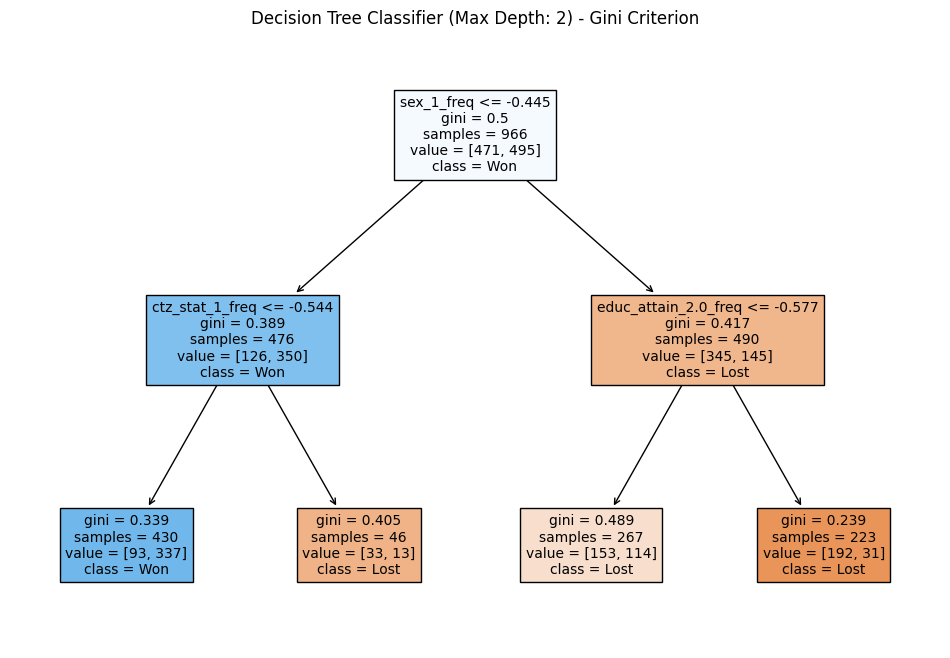

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create and train the model with limited max_depth
max_depth_limit = 2
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=max_depth_limit)
clf.fit(X_train, y_train)

# Plot the limited-depth decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=df.columns[:-1], class_names=["Lost", "Won"])
plt.title(f"Decision Tree Classifier (Max Depth: {max_depth_limit}) - Gini Criterion")
plt.show()


## 2.2. Decision Tree With Entropy Criterion

In [31]:
# create and train the model
clf2 = DecisionTreeClassifier(criterion='entropy', splitter='best')

In [32]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [33]:
# predict on validate set
y_test_pred = clf2.predict(X_test)

# predict on train set
y_train_pred = clf2.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('Accuracy = %f' % (accuracy))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))

Training MSE = 0.000000
Validating MSE = 1.024155
Accuracy = 0.743961
F1 Score = 0.735000
Precision Score = 0.720588
Recall Score = 0.750000
ROC-AUC Score = 0.744266


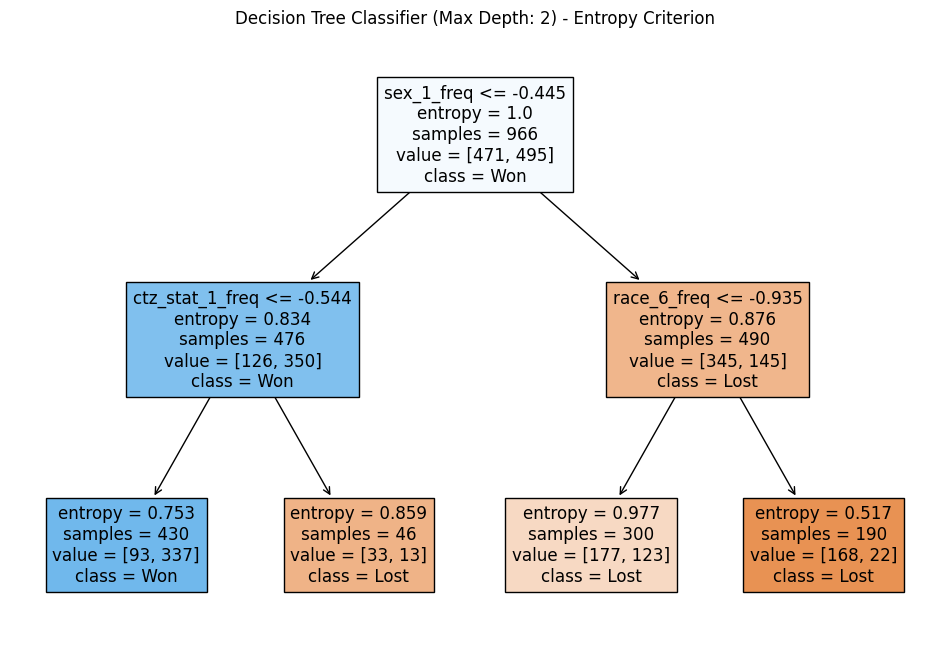

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create and train the model with max depth 3 using entropy criterion
max_depth_limit = 2
clf2 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=max_depth_limit)
clf2.fit(X_train, y_train)

# Plot the decision tree with limited depth
plt.figure(figsize=(12, 8))
plot_tree(clf2, filled=True, feature_names=df.columns[:-1], class_names=["Lost", "Won"])
plt.title(f"Decision Tree Classifier (Max Depth: {max_depth_limit}) - Entropy Criterion")
plt.show()


# 3. Test Trained Models With The 2020 Dataset

## 3.1. Decision Tree With Gini Criterion

In [34]:
clf1_pred_y_2020 = clf1.predict(X_df2)

accuracy = metrics.accuracy_score(y_df2, clf1_pred_y_2020)
f1 = metrics.f1_score(y_df2, clf1_pred_y_2020)
prec = metrics.precision_score(y_df2, clf1_pred_y_2020)
recall = metrics.recall_score(y_df2, clf1_pred_y_2020)
roc_auc = metrics.roc_auc_score(y_df2, clf1_pred_y_2020)

print("Testing MSE = %f" % metrics.mean_squared_error(y_df2, clf1_pred_y_2020))
print('Accuracy = %f' % (accuracy))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))

Testing MSE = 1.146444
Accuracy = 0.713389
F1 Score = 0.689342
Precision Score = 0.741463
Recall Score = 0.644068
ROC-AUC Score = 0.712530


In [35]:
# count the vote each counties
demo_count1 = repu_count1 = 0

for n in clf1_pred_y_2020:
    if n == -1:
        demo_count1 += 1
    else:
        repu_count1 += 1

## 3.2. Decision Tree With Entropy Criterion

In [36]:
clf2_pred_y_2020 = clf2.predict(X_df2)

accuracy = metrics.accuracy_score(y_df2, clf2_pred_y_2020)
f1 = metrics.f1_score(y_df2, clf2_pred_y_2020)
prec = metrics.precision_score(y_df2, clf2_pred_y_2020)
recall = metrics.recall_score(y_df2, clf2_pred_y_2020)
roc_auc = metrics.roc_auc_score(y_df2, clf2_pred_y_2020)

print("Testing MSE = %f" % metrics.mean_squared_error(y_df2, clf2_pred_y_2020))
print('Accuracy = %f' % (accuracy))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))

Testing MSE = 0.970711
Accuracy = 0.757322
F1 Score = 0.731481
Precision Score = 0.806122
Recall Score = 0.669492
ROC-AUC Score = 0.756233


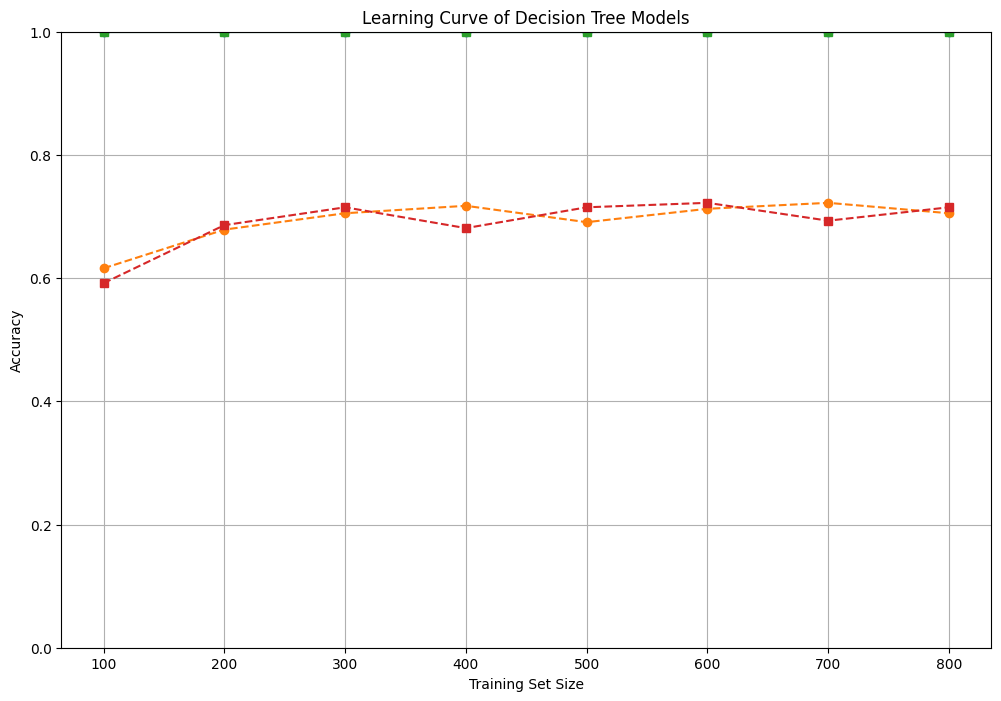

In [59]:
# Updated Training Sizes
train_sizes = [100, 200, 300, 400, 500, 600, 700, 800]

# Collecting accuracy scores
train_scores_clf1, test_scores_clf1 = [], []
train_scores_clf2, test_scores_clf2 = [], []

for size in train_sizes:
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=0)

    # Train and predict with model 1 (Gini criterion)
    clf1_subset = DecisionTreeClassifier(criterion='gini', splitter='best')
    clf1_subset.fit(X_train_subset, y_train_subset)
    train_scores_clf1.append(metrics.accuracy_score(y_train_subset, clf1_subset.predict(X_train_subset)))
    test_scores_clf1.append(metrics.accuracy_score(y_test, clf1_subset.predict(X_test)))

    # Train and predict with model 2 (Entropy criterion)
    clf2_subset = DecisionTreeClassifier(criterion='entropy', splitter='best')
    clf2_subset.fit(X_train_subset, y_train_subset)
    train_scores_clf2.append(metrics.accuracy_score(y_train_subset, clf2_subset.predict(X_train_subset)))
    test_scores_clf2.append(metrics.accuracy_score(y_test, clf2_subset.predict(X_test)))

# Plotting the learning curve
plt.figure(figsize=(12, 8))

plt.plot(train_sizes, test_scores_clf1, marker='o', linestyle='--', label='Testing (Gini)')
plt.plot(train_sizes, test_scores_clf2, marker='s', linestyle='--', label='Testing (Entropy)')
plt.title('Learning Curve of Decision Tree Models')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.l
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for better visualization
plt.grid(True)
plt.show()


In [43]:
# count the vote each counties
demo_count2 = repu_count2 = 0

for n in clf2_pred_y_2020:
    if n == -1:
        demo_count2 += 1
    else:
        repu_count2 += 1

# 4. Plot Performance Of 3 Models

Accuracy: 0.8200836820083682
              precision    recall  f1-score   support

        -1.0       0.78      0.89      0.83       242
         1.0       0.87      0.75      0.80       236

    accuracy                           0.82       478
   macro avg       0.83      0.82      0.82       478
weighted avg       0.83      0.82      0.82       478



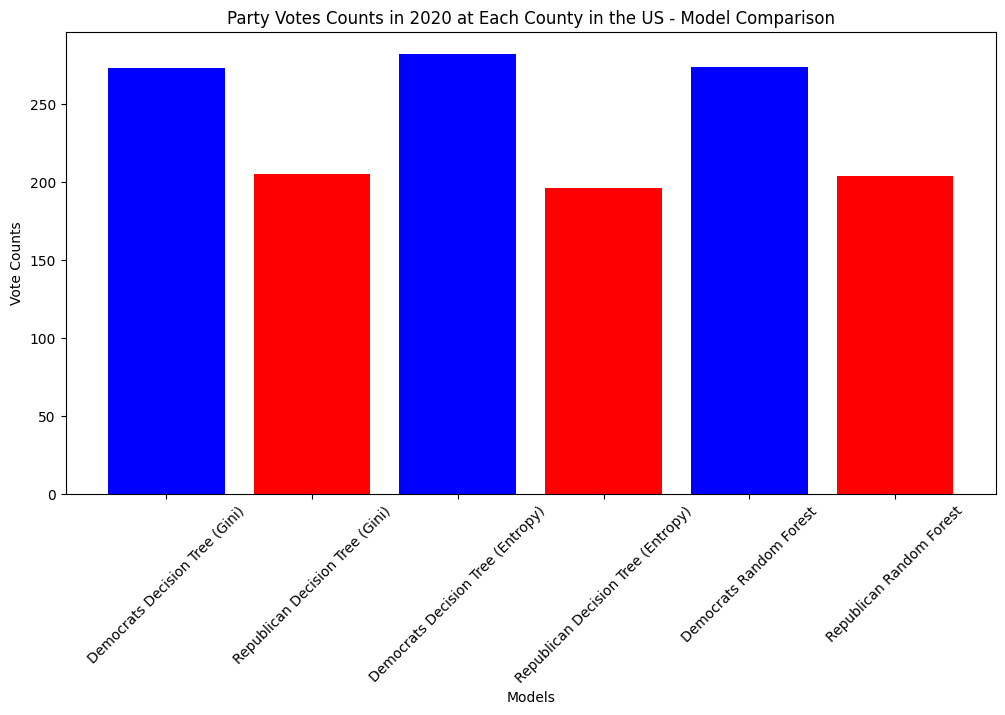

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train.ravel())  # ravel() converts y_train to 1D array

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_df2)

# Evaluate the model
accuracy_rf = accuracy_score(y_df2, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")

# Generate a classification report
print(classification_report(y_df2, y_pred_rf))

# count the vote each county for Random Forest
demo_count_rf = repu_count_rf = 0

for n in y_pred_rf:
    if n == -1:
        demo_count_rf += 1
    else:
        repu_count_rf += 1

# 4. Plot Performance Of 3 Models
votes = [demo_count1, repu_count1, demo_count2, repu_count2, demo_count_rf, repu_count_rf]
names = ['Democrats Decision Tree (Gini)', 'Republican Decision Tree (Gini)',
         'Democrats Decision Tree (Entropy)', 'Republican Decision Tree (Entropy)',
         'Democrats Random Forest', 'Republican Random Forest']

plt.figure(figsize=(12, 6))
plt.bar(names, votes, color=['blue', 'red', 'blue', 'red', 'blue', 'red'])
plt.title('Party Votes Counts in 2020 at Each County in the US - Model Comparison')
plt.ylabel('Vote Counts')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()


In [61]:
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Train the classifier
rf_classifier.fit(X_train, y_train.ravel())

# Predict on the training set
y_train_pred_rf = rf_classifier.predict(X_train)

# Predict on the test set
y_test_pred_rf = rf_classifier.predict(X_df2)

# Calculate metrics for training set
mse_train = mean_squared_error(y_train, y_train_pred_rf)
accuracy_train = accuracy_score(y_train, y_train_pred_rf)
f1_train = f1_score(y_train, y_train_pred_rf)
precision_train = precision_score(y_train, y_train_pred_rf)
recall_train = recall_score(y_train, y_train_pred_rf)
roc_auc_train = roc_auc_score(y_train, y_train_pred_rf)

# Calculate metrics for testing set
mse_test = mean_squared_error(y_df2, y_test_pred_rf)
accuracy_test = accuracy_score(y_df2, y_test_pred_rf)
f1_test = f1_score(y_df2, y_test_pred_rf)
precision_test = precision_score(y_df2, y_test_pred_rf)
recall_test = recall_score(y_df2, y_test_pred_rf)
roc_auc_test = roc_auc_score(y_df2, y_test_pred_rf)

# Print the metrics
print(f"Training MSE = {mse_train:.6f}")
print(f"Training Accuracy = {accuracy_train:.6f}")
print(f"Training F1 Score = {f1_train:.6f}")
print(f"Training Precision Score = {precision_train:.6f}")
print(f"Training Recall Score = {recall_train:.6f}")
print(f"Training ROC-AUC Score = {roc_auc_train:.6f}")

print(f"\nTesting MSE = {mse_test:.6f}")
print(f"Testing Accuracy = {accuracy_test:.6f}")
print(f"Testing F1 Score = {f1_test:.6f}")
print(f"Testing Precision Score = {precision_test:.6f}")
print(f"Testing Recall Score = {recall_test:.6f}")
print(f"Testing ROC-AUC Score = {roc_auc_test:.6f}")


Training MSE = 0.000000
Training Accuracy = 1.000000
Training F1 Score = 1.000000
Training Precision Score = 1.000000
Training Recall Score = 1.000000
Training ROC-AUC Score = 1.000000

Testing MSE = 0.719665
Testing Accuracy = 0.820084
Testing F1 Score = 0.804545
Testing Precision Score = 0.867647
Testing Recall Score = 0.750000
Testing ROC-AUC Score = 0.819215


GBM Training MSE = 0.000000
GBM Validating MSE = 0.898551
GBM Accuracy = 0.775362
GBM F1 Score = 0.768080
GBM Precision Score = 0.751220
GBM Recall Score = 0.785714
GBM ROC-AUC Score = 0.775885


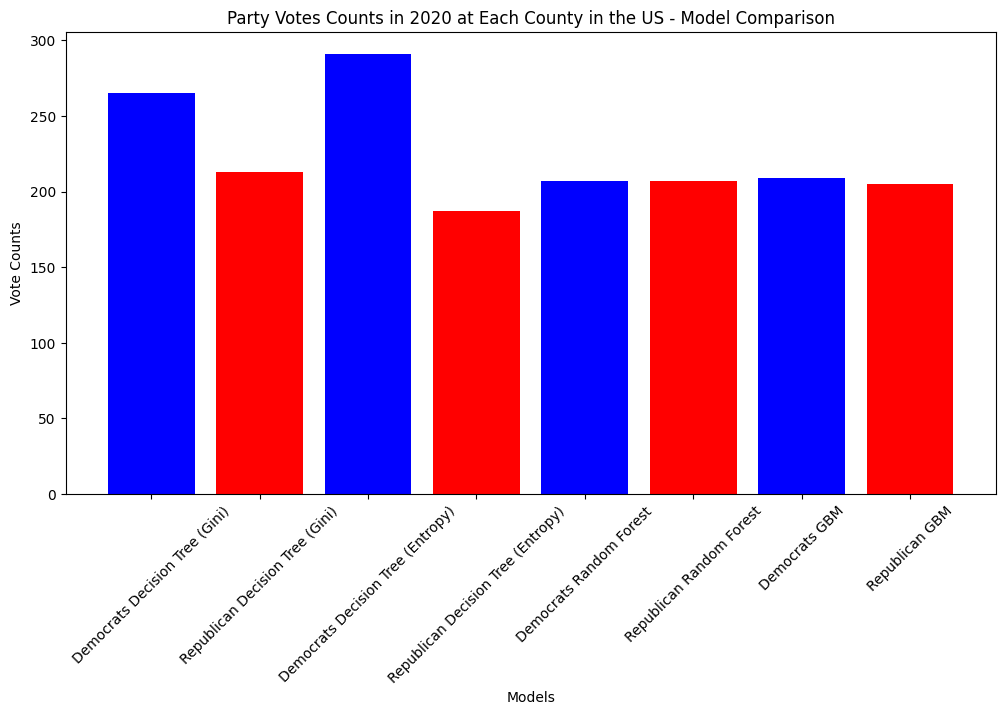

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

# 2.4. Gradient Boosting Machine (GBM)
# create and train the model
gbm_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1, max_depth=20, random_state=0)

gbm_clf.fit(X_train, y_train.ravel())  # ravel() is used to convert y_train to 1d array

# predict on validate set
y_test_pred_gbm = gbm_clf.predict(X_test)

# predict on train set
y_train_pred_gbm = gbm_clf.predict(X_train)

accuracy_gbm = metrics.accuracy_score(y_test, y_test_pred_gbm)
f1_gbm = metrics.f1_score(y_test, y_test_pred_gbm)
prec_gbm = metrics.precision_score(y_test, y_test_pred_gbm)
recall_gbm = metrics.recall_score(y_test, y_test_pred_gbm)
roc_auc_gbm = metrics.roc_auc_score(y_test, y_test_pred_gbm)

print("GBM Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred_gbm))
print("GBM Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred_gbm))
print('GBM Accuracy = %f' % (accuracy_gbm))
print('GBM F1 Score = %f' % (f1_gbm))
print('GBM Precision Score = %f' % (prec_gbm))
print('GBM Recall Score = %f' % (recall_gbm))
print('GBM ROC-AUC Score = %f' % (roc_auc_gbm))

# count the vote each county for GBM
demo_count_gbm = repu_count_gbm = 0

for n in y_test_pred_gbm:
    if n == -1:
        demo_count_gbm += 1
    else:
        repu_count_gbm += 1

# 4. Plot Performance Of 4 Models
votes = [demo_count1, repu_count1, demo_count2, repu_count2, demo_count_rf, repu_count_rf, demo_count_gbm, repu_count_gbm]
names = ['Democrats Decision Tree (Gini)', 'Republican Decision Tree (Gini)',
         'Democrats Decision Tree (Entropy)', 'Republican Decision Tree (Entropy)',
         'Democrats Random Forest', 'Republican Random Forest',
         'Democrats GBM', 'Republican GBM']

plt.figure(figsize=(12, 6))
plt.bar(names, votes, color=['blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red'])
plt.title('Party Votes Counts in 2020 at Each County in the US - Model Comparison')
plt.ylabel('Vote Counts')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()


![](https://pbs.twimg.com/media/Emuiuk7W4AA2MfT.jpg)